### Table of Contents

* [Case study classification project](#casestudy)
* [EDA - exploratory data analysis - get to know the data](#eda)
* [Get the sweet summary stats on each column to understand the distribution better](#summary)
* [Get a  representation of the numbers](#numbersrep)
* [Outliers](#outliers)
* [Box Plots](#boxplots)
* [Outliers](#outliers)
* [Pre-processing](#preprocessing)
* [Split off the dependant variable (label) ](#split)
* [TT split and get model](#ttsplit)
* [Apply model, train model](#applymoded)
* [Evaluate accuracy and test](#evaluate)
* [Visualising accuracy - ROC / AUC](#rocauc)
* [Data imbalanced -  SMOTE (oversample the minority class of the target label)](#smote)



## Case study classification project <a class="anchor" id="casestudy"></a>

In [1]:
# import libraries
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats

In [4]:
df_original = pd.read_excel('creditcardmarketing.xlsx')

In [5]:
# create a copy of the dataaet
df = df_original

###  EDA - exploratory data analysis - get to know the data (just the needed) <a class="anchor" id="eda"></a>

In [6]:
# standize the readers: replace spaces by _, put in lowercase, remove #
df.columns = df.columns.str.replace(' ', '_')
df.columns= df.columns.str.lower()
df.columns= df.columns.str.replace('#_', '')


In [7]:
# fill nulls with the means
col_miss_values= [ 'q2_balance', 'q3_balance', 'q4_balance']


mean_q2_balance = df['q2_balance'].mean()
df['q2_balance'] = df['q2_balance'].fillna(mean_q2_balance)
df['q2_balance'] = pd.to_numeric(df['q2_balance'], errors = 'coerce')

mean_q3_balance = df['q3_balance'].mean()
df['q3_balance'] = df['q3_balance'].fillna(mean_q3_balance)
df['q3_balance'] = pd.to_numeric(df['q3_balance'], errors = 'coerce')

mean_q4_balance = df['q4_balance'].mean()
df['q4_balance'] = df['q4_balance'].fillna(mean_q4_balance)
df['q4_balance'] = pd.to_numeric(df['q4_balance'], errors = 'coerce')

#df.dtypes

In [8]:
# check for more claning
# df.head(20)
# df.tail(20)
# drop customer_number
df=df.drop(['customer_number','average_balance','q1_balance'], axis=1)
df.head(10)

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1357.0,982.0,365.0
5,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1365.0,750.0,497.0
6,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,188.0,347.0,132.0
7,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,391.0,285.0,306.0
8,No,Air Miles,Postcard,Medium,1,No,Low,2,1,4,Yes,891.0,882.0,1353.0
9,No,Air Miles,Letter,High,2,No,Low,3,2,4,Yes,1454.0,514.0,115.0


###  New dataframe for binning <a class="anchor" id="eda"></a>

In [9]:
df = df.groupby(['offer_accepted', 'reward', 'mailer_type',
       'income_level', 'bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'credit_cards_held', 'homes_owned', 
       'own_your_home','q2_balance',
       'q3_balance', 'q4_balance'])['household_size'].sum().reset_index()

In [10]:
df['household_size'] = pd.qcut(df['household_size'],duplicates='drop', q=4)

In [11]:
df['household_size'].unique()

[(0.999, 3.0], (3.0, 4.0], (4.0, 9.0]]
Categories (3, interval[float64]): [(0.999, 3.0] < (3.0, 4.0] < (4.0, 9.0]]

In [12]:
df

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,own_your_home,q2_balance,q3_balance,q4_balance,household_size
0,No,Air Miles,Letter,High,1,No,High,1,1,No,15.0,436.0,154.0,"(0.999, 3.0]"
1,No,Air Miles,Letter,High,1,No,High,1,1,No,284.0,284.0,151.0,"(0.999, 3.0]"
2,No,Air Miles,Letter,High,1,No,High,1,1,No,532.0,1211.0,1866.0,"(3.0, 4.0]"
3,No,Air Miles,Letter,High,1,No,High,1,1,No,646.0,598.0,506.0,"(4.0, 9.0]"
4,No,Air Miles,Letter,High,1,No,High,1,1,No,821.0,740.0,705.0,"(3.0, 4.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,Yes,Points,Postcard,Medium,2,No,Medium,3,1,Yes,1261.0,1793.0,1562.0,"(3.0, 4.0]"
17996,Yes,Points,Postcard,Medium,2,Yes,Low,1,2,Yes,399.0,192.0,290.0,"(0.999, 3.0]"
17997,Yes,Points,Postcard,Medium,2,Yes,Low,2,1,No,1464.0,1615.0,754.0,"(3.0, 4.0]"
17998,Yes,Points,Postcard,Medium,2,Yes,Low,2,1,Yes,706.0,914.0,1330.0,"(4.0, 9.0]"


### Outliers <a class="anchor" id="boxplots"></a>


In [13]:
# find quartiles and clean up outliers
cols_outliers = [ 'q2_balance', 'q3_balance', 'q4_balance']

for col in cols_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print('Q1 of the column ', col,':', Q1)
    print('Q3 of the column ', col,':', Q3)
    print('IRQ of the column ', col,':', IQR)
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    print('lower_whisker: ', Lower_Whisker, ',' , 'upper whisker: ', Upper_Whisker)
    #  Outlier Treatment 
    df = df[df[col]< Upper_Whisker]
    df = df[df[col]> Lower_Whisker]
    


Q1 of the column  q2_balance : 664.0
Q3 of the column  q2_balance : 1342.0
IRQ of the column  q2_balance : 678.0
lower_whisker:  -353.0 , upper whisker:  2359.0
Q1 of the column  q3_balance : 633.0
Q3 of the column  q3_balance : 1461.0
IRQ of the column  q3_balance : 828.0
lower_whisker:  -609.0 , upper whisker:  2703.0
Q1 of the column  q4_balance : 363.0
Q3 of the column  q4_balance : 1210.0
IRQ of the column  q4_balance : 847.0
lower_whisker:  -907.5 , upper whisker:  2480.5


In [14]:
# label / encode any categorical columns 
cat = df.select_dtypes(include = np.object)
cat

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
0,No,Air Miles,Letter,High,No,High,No
1,No,Air Miles,Letter,High,No,High,No
2,No,Air Miles,Letter,High,No,High,No
3,No,Air Miles,Letter,High,No,High,No
4,No,Air Miles,Letter,High,No,High,No
...,...,...,...,...,...,...,...
17995,Yes,Points,Postcard,Medium,No,Medium,Yes
17996,Yes,Points,Postcard,Medium,Yes,Low,Yes
17997,Yes,Points,Postcard,Medium,Yes,Low,No
17998,Yes,Points,Postcard,Medium,Yes,Low,Yes


In [15]:
# locate the target column in the last position
cols = list(df.columns)
cols = cols[1:]+[cols[0]]
df = df[cols]


In [16]:
# convert balances to float
df['q2_balance'] = pd.to_numeric(df.q2_balance, errors='coerce')
df['q3_balance'] = pd.to_numeric(df.q3_balance, errors='coerce')
df['q4_balance'] = pd.to_numeric(df.q4_balance, errors='coerce')

### Density Plots

In [17]:
numerics = ['int64', 'float64']
df_num = df.select_dtypes(include=numerics)
df_num
# for col in df_num.columns:
#     ax = sns.kdeplot(data= df_num, x= col, shade= True)
#     plt.figure()

,bank_accounts_open,credit_cards_held,homes_owned,q2_balance,q3_balance,q4_balance
0,1,1,1,15.0,436.0,154.0
1,1,1,1,284.0,284.0,151.0
2,1,1,1,532.0,1211.0,1866.0
3,1,1,1,646.0,598.0,506.0
4,1,1,1,821.0,740.0,705.0
...,...,...,...,...,...,...
17995,2,3,1,1261.0,1793.0,1562.0
17996,2,1,2,399.0,192.0,290.0
17997,2,2,1,1464.0,1615.0,754.0
17998,2,2,1,706.0,914.0,1330.0


### Pre-processing <a class="anchor" id="preprocessing"></a>


In [18]:
# reset index
df = df.reset_index(drop = True)

In [19]:
#df.head()

In [20]:
# categorical = pd.get_dummies(cat, columns =['reward', 'mailer_type', 'income_level',
#        'overdraft_protection', 'credit_rating', 'own_your_home',
#        'average_balance', 'offer_accepted'],drop_first=True)

cat = df.select_dtypes(exclude = ['float64'])
cat.info()

# categorical.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17990 entries, 0 to 17989
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   reward                17990 non-null  object  
 1   mailer_type           17990 non-null  object  
 2   income_level          17990 non-null  object  
 3   bank_accounts_open    17990 non-null  int64   
 4   overdraft_protection  17990 non-null  object  
 5   credit_rating         17990 non-null  object  
 6   credit_cards_held     17990 non-null  int64   
 7   homes_owned           17990 non-null  int64   
 8   own_your_home         17990 non-null  object  
 9   household_size        17990 non-null  category
 10  offer_accepted        17990 non-null  object  
dtypes: category(1), int64(3), object(7)
memory usage: 1.4+ MB


In [21]:
categorical = pd.get_dummies(cat, columns =['reward',
 'mailer_type',
 'income_level',
 'bank_accounts_open',
 'overdraft_protection',
 'credit_rating',
 'credit_cards_held',
 'homes_owned',
 'household_size',
 'own_your_home',
 'offer_accepted'],drop_first=True)

In [22]:
# numerical scaling 
from sklearn.preprocessing import Normalizer

In [23]:
# df_num are the numerical

X = df_num.drop(['bank_accounts_open', 'credit_cards_held', 'homes_owned'], axis=1)
transformer = Normalizer().fit(X)
X_normalised= transformer.transform(X)
X_normalised = pd.DataFrame(X_normalised)

In [24]:
X_normalised


,0,1,2
0,0.032423,0.942415,0.332871
1,0.661875,0.661875,0.351913
2,0.232594,0.529457,0.815828
3,0.636228,0.588954,0.498345
4,0.626250,0.564464,0.537766
...,...,...,...
17985,0.468491,0.666142,0.580320
17986,0.753817,0.362739,0.547887
17987,0.634722,0.700189,0.326899
17988,0.400804,0.518889,0.755057


### Split off the dependant variable (label) <a class="anchor" id="split"></a>

In [25]:
#sort out the categoricals 
y= categorical['offer_accepted_Yes']
categorical=categorical.drop(['offer_accepted_Yes'], axis=1)
#categorical

In [26]:
# bring the numerical data (scaled)in with the x cat
X = np.concatenate((X_normalised, categorical),axis=1)

### TT split, get model <a class="anchor" id="ttsplit"></a>

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.4, random_state=40)

### Apply model and train model <a class="anchor" id="applymodel"></a>

In [29]:
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_train, y_train)

### Evaluate accuracy and test <a class="anchor" id="evaluate"></a>

In [30]:
from sklearn.metrics import accuracy_score 
predictions = classification.predict(X_test)

In [31]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [32]:
accuracy_score(y_test, predictions)

0.9460811561978877

### Visualising accuracy - ROC / AUC  <a class="anchor" id="rocauc"></a>

In [33]:
import sklearn.metrics as metrics 
probs = classification.predict_proba(X_test)
preds =probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.7477774025706567


In [34]:
#definitions 
# tpr = true positive rate 
# fpr = false positive rate

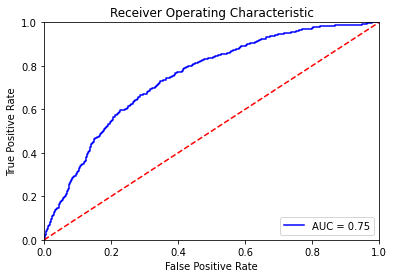

In [35]:
# method to plot AUC visually 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

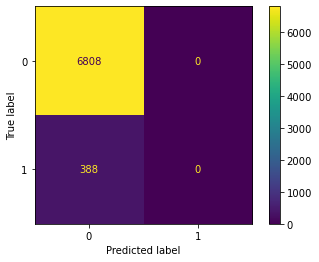

In [36]:
# confusion matrix 

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix

accuracy_score(y_test,predictions)
confusion_matrix(y_test,predictions)
plot_confusion_matrix(classification, X_test, y_test)
plt.show()


### Data imbalanced -  SMOTE (oversample the minority class of the target label) <a class="anchor" id="smote"></a>

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
smote = SMOTE()


In [39]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    16967
1    16967
Name: offer_accepted_Yes, dtype: int64

In [40]:
#re do train test split It2

X_train, X_test, y_train, y_test =train_test_split(X_sm, y_sm, test_size= 0.4, random_state=40)

In [41]:
# apply model It2 
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_train, y_train)

In [42]:
#accuracy assessment It2
predictions = classification.predict(X_test)
accuracy_score(y_test, predictions)

0.721305436864594

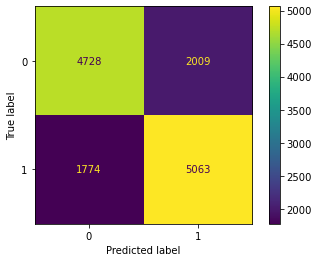

In [43]:
#Conf matrix It2 
confusion_matrix(y_test,predictions)
plot_confusion_matrix(classification, X_test, y_test)
plt.show()

#### conclusion on imbalance:

- The SMOTE technique solved the imbalanced but the accuracy got too low (71%), but the TOMEK doesn't.
    

### References
- lectures
- women who code: munibootcamp of data science
- https://machinelearningmastery.com/confusion-matrix-machine-learning/
- https://medium.com/analytics-vidhya/outlier-treatment-9bbe87384d02
    